In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
results_cols = pd.read_csv("prog2/results_cols.csv")
results_cols = results_cols.groupby(results_cols.index // 15).mean()

results_rows = pd.read_csv("prog1/results_rows.csv")
results_rows = results_rows.groupby(results_rows.index // 15).mean()

avg = (
    results_cols["t1"].mean()
    + results_cols["t3"].mean()
    + results_rows["t1"].mean()
    + results_rows["t3"].mean()
) / 4

# print in scientific notation
print(f"Average time: {avg:.2e}")

Average time: 4.62e-04


15.613
9.003
5.885
4.394
4.166
3.717
3.4
3.282
3.228
3.207
3.198


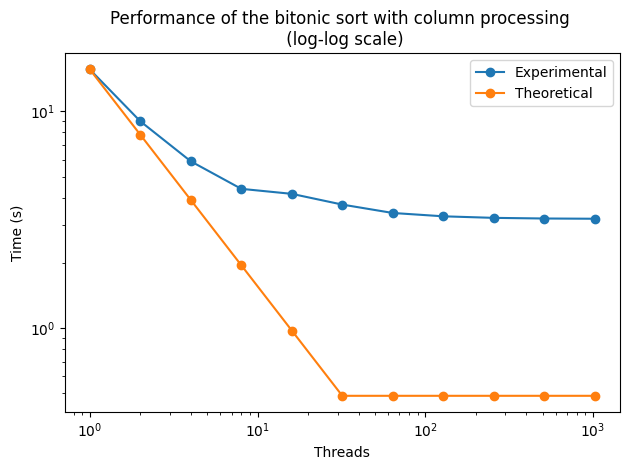

In [15]:
results_cols = pd.read_csv("prog2/results_cols.csv")
results_cols = results_cols.groupby(results_cols.index // 15).mean()

experimental_curve = results_cols["t2"]

theoretical_curve = [experimental_curve[0] / 2**i for i in range(6)] + [
    experimental_curve[0] / 2**5 for i in range(6, 11)
]

plt.plot(
    [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024],
    experimental_curve,
    label="Experimental",
    marker="o",
)
plt.plot(
    [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024],
    theoretical_curve,
    label="Theoretical",
    marker="o",
)
plt.legend()
plt.title("Performance of the bitonic sort with column processing \n (log-log scale)")
plt.xlabel("Threads")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Time (s)")
plt.tight_layout()

for elem in results_cols["t2"]:
    print(round(elem, 3))

In [16]:
# # graphic with speed up in experimental curve (% of improvement from previous)
# speed_up = [experimental_curve[i - 1] / experimental_curve[i] for i in range(1, 11)]

# # barplot with legend above the bars and clip negative values
# plt.figure(figsize=(10, 5))
# sns.barplot(
#     x=[f"{2**(i-1)}→{2**i}" for i in range(1, 11)], y=speed_up, palette="viridis"
# )

# for i in range(10):
#     plt.text(
#         i,
#         speed_up[i] + 0.015,
#         f"{speed_up[i]:.2f}",
#         ha="center",
#     )

# plt.ylim(1, 2)
# # add top margin
# plt.title("Improvement from previous configuration")
# plt.xlabel("Threads")
# plt.ylabel("Factor of improvement")

In [17]:
# graphic with speed up in experimental curve (% of improvement from previous)
speed_up = [experimental_curve[0] / experimental_curve[i] for i in range(1, 11)]

# # barplot with legend above the bars and clip negative values
# plt.figure(figsize=(10, 5))
# sns.barplot(x=[f"{2**i}" for i in range(1, 11)], y=speed_up, palette="viridis")

# for i in range(10):
#     plt.text(
#         i,
#         speed_up[i] + 0.05,
#         f"{speed_up[i]:.2f}",
#         ha="center",
#     )

# plt.ylim(1, 5.2)
# # add top margin
# plt.title("Improvement from single thread configuration")
# plt.xlabel("Threads")
# plt.ylabel("Factor of improvement")

for elem in speed_up:
    print(round(elem, 3))

1.734
2.653
3.553
3.747
4.2
4.591
4.757
4.836
4.869
4.881
